## Predicting heart disease using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:

##Problem definition
##Data Evaluation
##Features Modelling

Experimentation
1. Problem Definition:
In a statement,
Given clinical parameters about a patient, can we predict whether or not they have heart disease?

2. Data:
The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease
There is also a version of it available on Kaggle. https://www.kaggle.com/ronitf/heart-disease-uci

3. Evaluation:
If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

4. Features:
This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).

Create data dictionary

1. age - age in years

2. sex - (1 = male; 0 = female)

3. cp - chest pain type

        0: Typical angina: chest pain related decrease blood supply to the heart
        1: Atypical angina: chest pain not related to heart
        2: Non-anginal pain: typically esophageal spasms (non heart related)
        3: Asymptomatic: chest pain not showing signs of disease

4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern

5. chol - serum cholestoral in mg/dl

        serum = LDL + HDL + .2 * triglycerides
        above 200 is cause for concern

6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
        
        '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results

        0: Nothing to note

        1: ST-T Wave abnormality
            can range from mild symptoms to severe problems
            signals non-normal heart beat

        2: Possible or definite left ventricular hypertrophy

            Enlarged heart's main pumping chamber

8. thalach - maximum heart rate achieved

9. exang - exercise induced angina (1 = yes; 0 = no)

10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more

11. slope - the slope of the peak exercise ST segment

        0: Upsloping: better heart rate with excercise (uncommon)

        1: Flatsloping: minimal change (typical healthy heart)

        2: Downslopins: signs of unhealthy heart

12. ca - number of major vessels (0-3) colored by flourosopy
            
        colored vessel means the doctor can see the blood passing through
        the more blood movement the better (no clots)


13. thal - thalium stress result
        
        1,3: normal

        6: fixed defect: used to be defect but ok now

        7: reversable defect: no proper blood movement when excercising

14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

##Preparing the tools

We're going to use pandas, Matplotlib and NumPy for data analysis and manipulation.


## Importing Libraries and models

We are going to use the pandas, matplotilib, and numpy for data analysis and manipulation.

In [3]:
## Exploratory data analysis (EDA) and plotting libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## plots to appear inside notebook



%matplotlib inline 
## Models from SKLEARN
 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model Evaluations
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, plot_roc_curve



In [7]:
## Get our data ready and exploring it

df = pd.read_csv('heart-disease.csv')
df

df.shape ## Rows and columns





(303, 14)

## EDA analysis - Data Exploration

The goal here is to find out more about the data and become a subject matter expert on the data set you're wokring with.

1. What questions are you trying to solve?
2. What kind of data do we have and how to we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change an dremove features to get more out of the data?

In [8]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
## Lets find out how many of each class they are.

df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

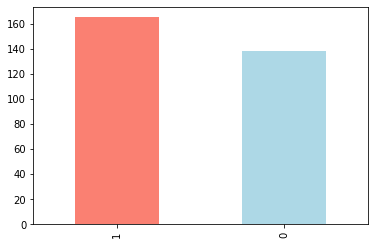

In [13]:
df['target'].value_counts().plot(kind='bar', color =['salmon', 'lightblue']);

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [15]:
## Checking missing values

df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [16]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart Disease Frequency according to sex

In [17]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [18]:
 pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


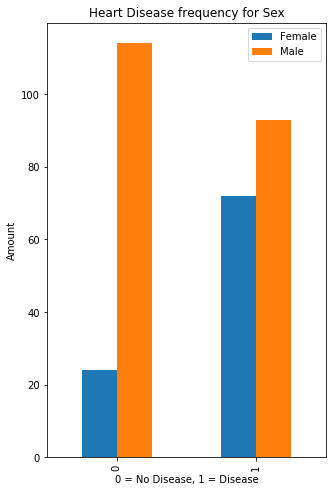

In [28]:
# Create a plot of crosstab for sex and target

pd.crosstab(df.target,df.sex).plot(kind='bar', figsize= (5,8));

plt.title('Heart Disease frequency for Sex')

plt.xlabel('0 = No Disease, 1 = Disease')
plt.ylabel('Amount')
plt.legend([('Female'), ('Male')]);

Age vs Max Heart Rate for Heart Disease

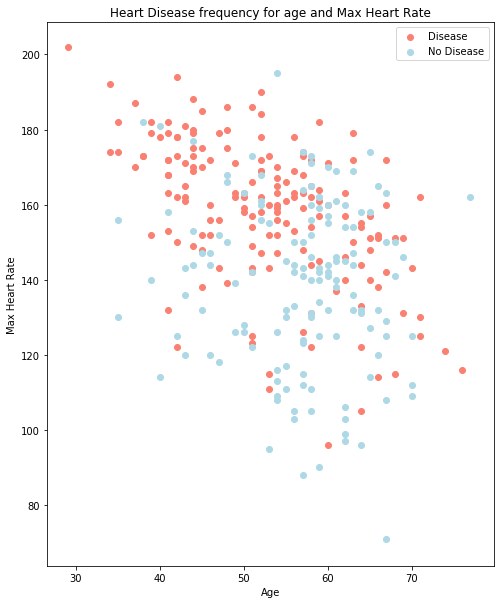

In [34]:
## Create another figure

plt.figure(figsize= (8,10))

## Scatter with positive examples

plt.scatter(df.age[df.target==1],df.thalach[df.target==1], c='salmon');


## Scatter with negative examples

plt.scatter(df.age[df.target==0],df.thalach[df.target==0], c='lightblue');

## Add some helpful info

plt.title('Heart Disease frequency for age and Max Heart Rate')

plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend([('Disease'), ('No Disease')]);


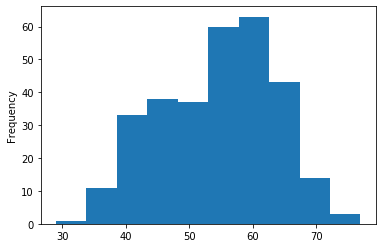

In [35]:
## CHeck the distribution of the age column with a histogram
## Histogram is used to tell outliers
df.age.plot.hist();

## Compare CP and target for heart disease frequency

3. cp - chest pain type

        0: Typical angina: chest pain related decrease blood supply to the heart
        1: Atypical angina: chest pain not related to heart
        2: Non-anginal pain: typically esophageal spasms (non heart related)
        3: Asymptomatic: chest pain not showing signs of disease



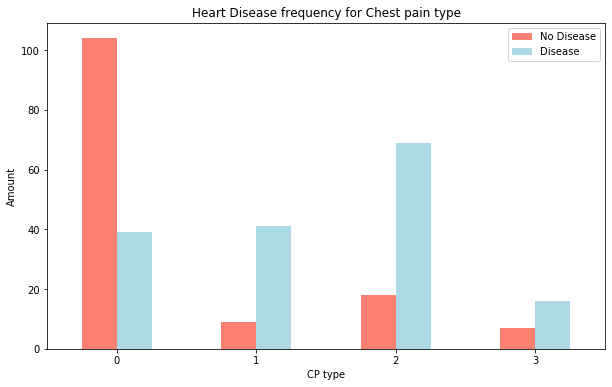

In [40]:
pd.crosstab(df.cp,df.target
        )

## making the cross tab visual

pd.crosstab(df.cp,df.target
        ).plot.bar(figsize= (10,6), color = ['salmon','lightblue'])

plt.title('Heart Disease frequency for Chest pain type')

plt.xlabel('CP type')
plt.ylabel('Amount')
plt.legend([('No Disease'), ('Disease')]);
plt.xticks(rotation=0);

## Checking this column helped us understand this feature might not be useful

In [41]:
 df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [42]:
## Make a correlation matrix using .corr()

df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


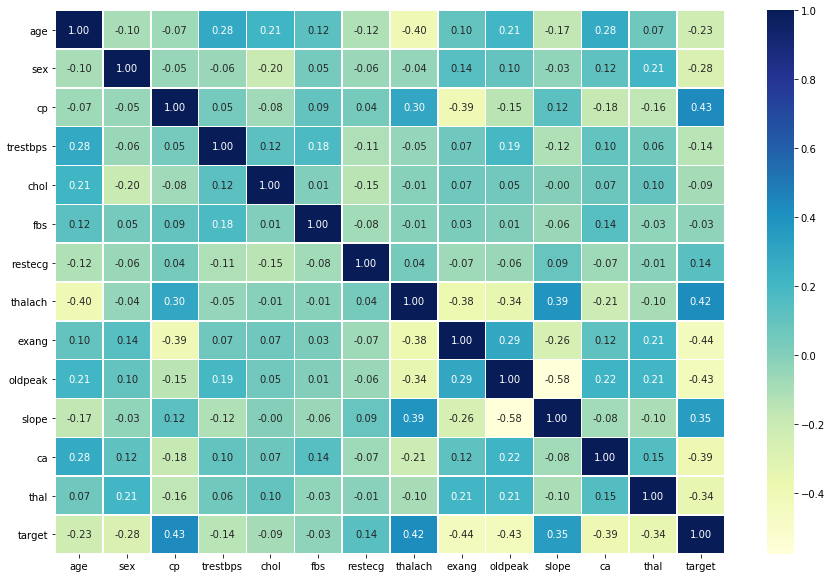

In [47]:
## Let's make our correlation matrix a little better to visualize

corr_matrix = df.corr()
fig, ax= plt.subplots(figsize = (15,10))
ax= sns.heatmap(corr_matrix, annot = True, linewidths = .5, fmt = '.2f', cmap= 'YlGnBu')

## Study Correlation matrix and how can be used in ML model

## Modelling

In [50]:
## Split the data into X and y

X= df.drop('target' , axis =1)
y= df['target']

## Split in train and split
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)



## Build machine learning model

We will train,test and predict

We are going to try 3 ML models
1. Logistic Regression
2. Knearest Neighbours Classifier
3. Randome Forest Classifier

In [70]:
## Put models in a dictionary

models = {'LR': LogisticRegression(), 'KN': KNeighborsClassifier(), 'RFC': RandomForestClassifier()}


## Create function to fit and score models

def fit_and_score(models, X_train,X_test,y_train,y_test):
    """
    Fit, train and score different models of sklear
    models: dictionary of models
    X_train: training data
    X_test: testing data
    y_train: training labels
    y_test: testing labels
    """
    ## setting random seed
    np.random.seed(42)
    ## Dictionary for storing score
    
    model_score = {}
    
    ## Defining Function
    
    for model_name, models in models.items():
        ## Fit the model
        models.fit(X_train, y_train)
        ## Score and save the score
        model_score[model_name] = models.score(X_test, y_test)
        
    return model_score

    

In [89]:
model_score = fit_and_score(models=models, X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)

model_score

/Users/avromukherjee/Desktop/ML_Project_1/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LR': 0.8852459016393442, 'KN': 0.6885245901639344, 'RFC': 0.8360655737704918}

In [ ]:
## model comparison plot

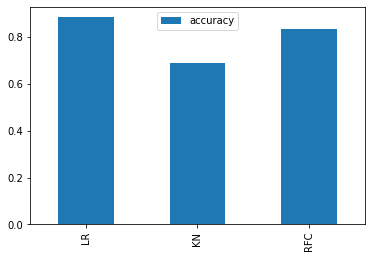

In [92]:
model_compare = pd.DataFrame(model_score, index=['accuracy'])
model_compare.T.plot.bar()

 ## Now that we've got a baseline model, and we know a model's first predictions aren't always what we should based our next steps off.
    
    What should we do?
    
    Let's look at the following:
    
    1. Hyperparameter tuning
    2. Future importance
    3. confussion matrix
    4. cross validation
    5. precision
    6. recall
    7. classification report
    8. ROC
    9. AUC - Area under the curve

In [103]:
## Hyper parameter tuning - Lets tune KNN (By hand)

train_scores = []
test_scores = []

## Create a list of different values of n_neighbours

neighbours = range(1, 21)

##Setup KNN
KNN = KNeighborsClassifier()

## loop through neighbours

for i in neighbours:
    KNN.set_params(n_neighbors=i)
    
    ## fit the model
    KNN.fit(X_train, y_train)
    
    ## update training scores list
    train_scores.append(KNN.score(X_train, y_train))
    
    ## update test scores list
    test_scores.append(KNN.score(X_test,y_test))
    


In [97]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [98]:
test_scores


[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Max KNN score on the test score: 75.41


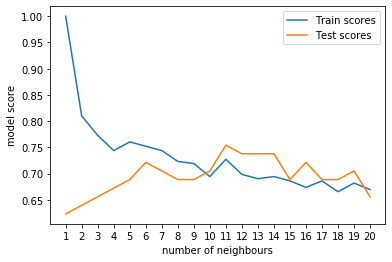

In [102]:
plt.plot(neighbours, train_scores, label = 'Train scores')
plt.plot(neighbours, test_scores, label = 'Test scores')

plt.xlabel('number of neighbours')
plt.ylabel('model score')
plt.xticks(np.arange(1, 21, 1))
plt.legend()

print(f'Max KNN score on the test score: {max(test_scores)*100:.2f}')


## Experiment for tuning gives us better understanding if model is good or not

In [112]:
## HP tuning with randomized search cv

##Instantiate Randomized search cv

##Create hyperparameters grid for logistic regression

log_reg_grid = {'C':np.logspace(-4,4, 20),'solver':['liblinear']}

##Create hyperparameters grid for Random Forest Classifier

rfc_grid = {'n_estimators': np.arange(10, 1000, 50), 'max_depth':[None, 3, 5, 10], 'min_samples_split': np.arange(2, 20, 2),'min_samples_leaf': np.arange(2, 20, 2) }


## we got the HP set

In [107]:
## tuning randomized cv
np.random.seed(42)

## setup Randonized searchcv
rcv_lgreg = RandomizedSearchCV(LogisticRegression(), param_distributions= [log_reg_grid], n_iter=20, cv =5, verbose= True  )


## Fit random hyperparameter for LogisticRegression
rcv_lgreg.fit(X_train, y_train)



Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions=[{'C'...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [108]:
## Check best Logistic Regression HP

rcv_lgreg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [109]:
rcv_lgreg.score(X_test,y_test)

0.8852459016393442

## Now we have tuned LR, lets do the same for random forest

In [113]:
## tuning randomized cv
np.random.seed(42)

## setup Randonized searchcv
rcv_rfc = RandomizedSearchCV(RandomForestClassifier(), param_distributions= [rfc_grid], n_iter=20, cv =5, verbose= True  )


## Fit random hyperparameter for LogisticRegression
rcv_rfc.fit(X_train, y_train)

## Fit random HP for Random forest Classifier
rcv_rfc.score(X_test, y_test)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   55.0s finished


0.8688524590163934

In [114]:
## Find the best parameter

rcv_rfc.best_params_

{'n_estimators': 560,
 'min_samples_split': 12,
 'min_samples_leaf': 18,
 'max_depth': 3}

In [115]:
## Evaluate the randomized search for random forest classifier
rcv_rfc.score(X_test, y_test)

0.8688524590163934

In [118]:
model_compare

,LR,KN,RFC
accuracy,0.885246,0.688525,0.836066


## Now we confirmed that logistic reggression model gives best result, we will tune it more with GridSearchCV

In [119]:
## Grid Search CV

## Grid for Logistic regression
log_reg_grid = {'C':np.logspace(-4,4, 30),'solver':['liblinear']}

## tuning randomized cv
np.random.seed(42)

## setup Randonized searchcv
gs_lgreg = GridSearchCV(LogisticRegression(), param_grid= [log_reg_grid], cv =5, verbose= True  )


## Fit random hyperparameter for LogisticRegression
gs_lgreg.fit(X_train, y_train)



Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': array([1.00000000e-04, 1....
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5

In [120]:
gs_lgreg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [122]:
gs_lgreg.score(X_test,y_test)

0.8852459016393442

 ## Evaluating our tuned ML classifier, beyond accuracy
    
    * ROC and AUC score
    *Confusion matrxi
    *Classification
    *Recall and F1
    
    ... and it would be great if we can use cross validation
    
    
To make comparison and evaluate our trained model, we need to make some predictions

In [124]:
## Make predictions wth tuned model

y_preds = gs_lgreg.predict(X_test)

In [125]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

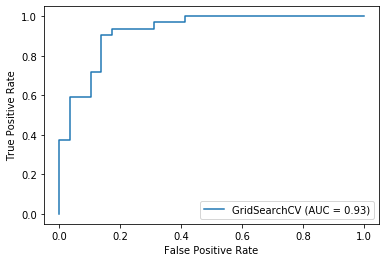

In [127]:
## Plot ROC curve and calculate AUC metrics 

plot_roc_curve(gs_lgreg, X_test, y_test );

In [129]:
## Confusion metrics

con_mat = confusion_matrix(y_test
                           , y_preds)

Text(33.0, 0.5, 'Predicted Values')

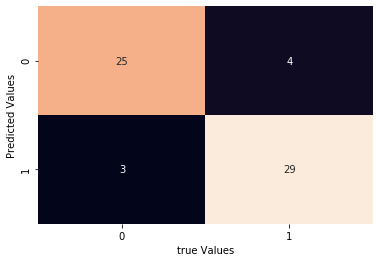

In [145]:
snsCF= sns.heatmap(con_mat, annot=True, cbar= None, )
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

## Lets get classification, cross val, precision, recall and f1

In [146]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [147]:
cross_val_score(LogisticRegression(),X, y, cv=10)

/Users/avromukherjee/Desktop/ML_Project_1/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/avromukherjee/Desktop/ML_Project_1/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

array([0.87096774, 0.80645161, 0.83870968, 0.9       , 0.9       ,
       0.86666667, 0.83333333, 0.86666667, 0.7       , 0.73333333])

In [155]:
## Create a new classifier with best parameters

clf = LogisticRegression(C=0.23357214690901212, solver= 'liblinear')

In [157]:
## cross val accuracy

cv_acc = cross_val_score(clf, X, y, cv =5 ,scoring='accuracy')
cv_acc_mean = np.mean(cv_acc)

cv_acc_mean

0.8479781420765027

In [158]:
## cross val precision


cv_prec = cross_val_score(clf, X, y, cv =5 ,scoring='precision')

cv_prec_mean = np.mean(cv_prec)

cv_prec_mean

0.8215873015873015

In [159]:
## cross cal recall


cv_recall = cross_val_score(clf, X, y, cv =5 ,scoring='recall')

cv_recall_mean = np.mean(cv_recall)

cv_recall_mean

0.9272727272727274

In [160]:
## cross cal recall


cv_f1 = cross_val_score(clf, X, y, cv =5 ,scoring='f1')

cv_f1_mean = np.mean(cv_f1)

cv_f1_mean

0.8705403543192143

Text(0.5, 1.0, 'Cross Validation Classification Metrics')

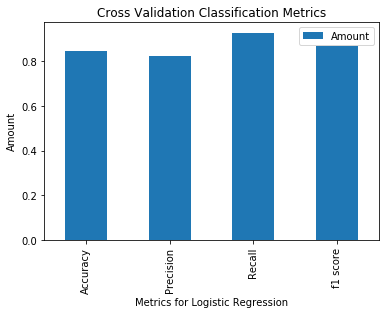

In [166]:
## Visualize our cross val metrics

cv_metrics = pd.DataFrame({'Accuracy': cv_acc_mean, 'Precision': cv_prec_mean, 'Recall': cv_recall_mean, 'f1 score': cv_f1_mean}, index=['Amount'])

cv_metrics.T.plot.bar();
plt.ylabel('Amount')
plt.xlabel('Metrics for Logistic Regression')
plt.title('Cross Validation Classification Metrics')

## Feature Importance

Feature importance is another way of asking, 'Which feature contribute most to the outcomes of the model and how much did they contribute?'

Finding feature importance is different for different ML models.

Lets find the Feature importance for our logistic regression.

In [167]:
## Fit an instance of Logistic Reqgression

clf = LogisticRegression(C=0.23357214690901212, solver= 'liblinear')

clf.fit(X_train, y_train)

LogisticRegression(C=0.23357214690901212, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [168]:
clf.coef_  ## How each each feature contributes to target

array([[ 0.00369922, -0.90424098,  0.67472823, -0.0116134 , -0.00170364,
         0.04787687,  0.33490208,  0.02472938, -0.63120414, -0.57590996,
         0.47095166, -0.65165344, -0.69984217]])

In [172]:
## Match coef's of features to columns

feature_dict = dict(zip(df.columns,list(clf.coef_[0])))

feafeature_dict

{'age': 0.003699223396114675,
 'sex': -0.9042409779785583,
 'cp': 0.6747282348693419,
 'trestbps': -0.011613398123390507,
 'chol': -0.0017036431858934173,
 'fbs': 0.0478768694057663,
 'restecg': 0.33490207838133623,
 'thalach': 0.024729380915946855,
 'exang': -0.6312041363430085,
 'oldpeak': -0.5759099636629296,
 'slope': 0.47095166489539353,
 'ca': -0.6516534354909507,
 'thal': -0.6998421698316164}

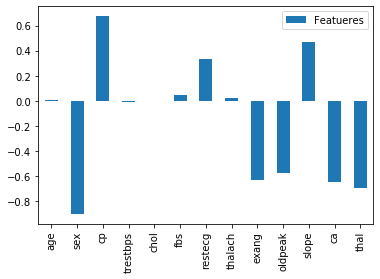

In [175]:
feature_dict_df = pd.DataFrame(feature_dict, index=['Featueres'])

feature_dict_df.T.plot.bar()

In [ ]:
# Experimentation

If you have not met the accuracy goal, ask yourself..

* Could you collect more data? 
* Could we try a better model? like CatBoost or XGBoost?
* COuld you improve the current models?
* If your model is good enough, how would you export it and share it with others?